# Trabajo Practico Final - Parte 1

### Definición del objetivo.

Se estima que el costo de las renuncias voluntarias en empresas privadas es alrededor de 6 a 9 meses del salario del trabajador, sin contar el costo oportunidad de no tener a un empleado capacitado para lograr los objetivos del negocio. https://www.peoplekeep.com/blog/employee-retention-the-real-cost-of-losing-an-employee#:~:text=The%20cost%20of%20employee%20turnover%20is%20high&text=Some%20studies4%20predict%20that,in%20recruiting%20and%20training%20expenses.

El objetivo de este análisis es encontrar una correlación entre la renuncia de personal y variables como: tiempo en el puesto, edad, salario, y tiempo en la empresa. Estas variables por lo general se obtienen de la ejecución de procesos regulares de recursos humanos, como la administración de personal, medición de clima laboral, evaluación de desempeño, entre otros. Se registran regularmente en los ERPs y se analizan como variables independientes. Sin embargo, un análisis integral podría indicarnos las variables que más valoran los empleados para permanecer en una empresa.

### Preguntas y objetivos de la investigación.

- ¿Qué edad tienen los trabajadores que desertan con mayor frecuencia en el trabajo?
- ¿Qué variables impactan más en la permanencia de los trabajadores?
- ¿A mayor cantidad de años en la empresa, mayor es el salario?

###  Equipo de trabajo.
- Alonso Medina

### Fuente de datos

El conjunto de datos utilizado es ficticio, fue creado por los científicos de datos de IBM Watson. Tiene 35 atributos de alrededor de 1470 empleados. De estos 1470 empleados, nuestra variable objetivo es "Deserción", que tiene un valor categórico de "Sí" o "No".El dataset se encuentra en el siguiente link https://www.kaggle.com/datasets/rohitsahoo/employee

### Importación de librerías

In [1]:
#Importación de librerías
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('HR Employee Attrition.csv')
df.head()  

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### Data Wrangling (Munging)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

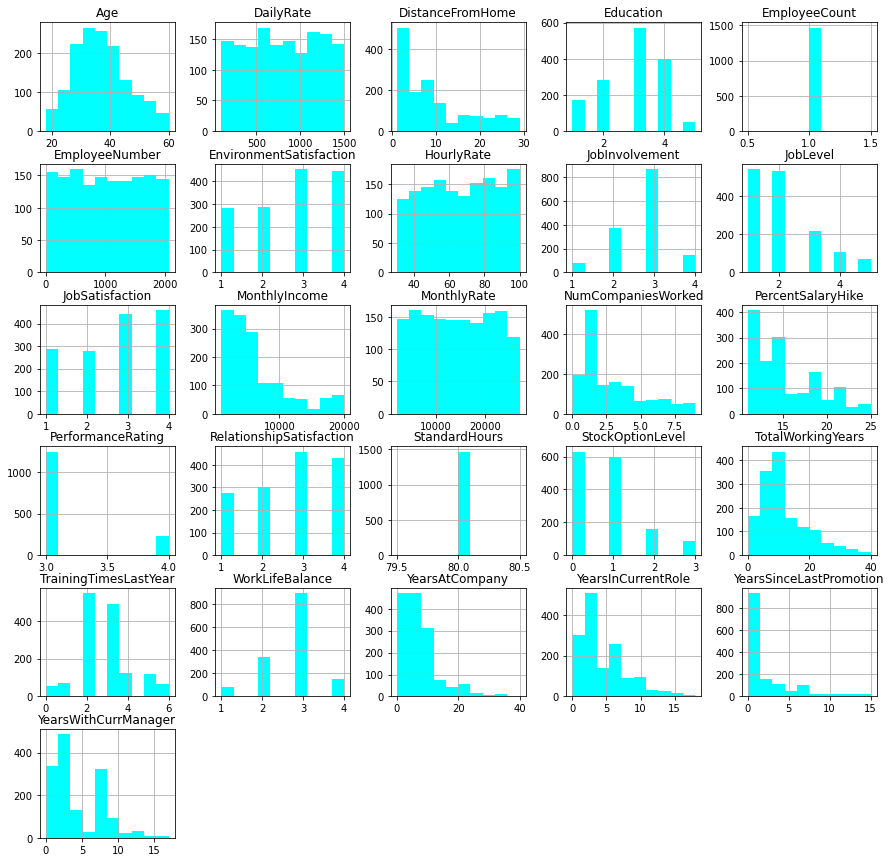

In [6]:
df.hist(color='cyan', figsize=(15,15))

In [7]:
df1 = df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Mapa de correlación de variables

En este análisis podemos observar que las variables que mayor correlación muestran son:
- Age con TotalWorkingYears
- Job LEvel con MonthlyIncome
- Job Level con TotalWorking Years

Estás variables sin embargo tienen que ser comparadas con respecto al personalque desertó

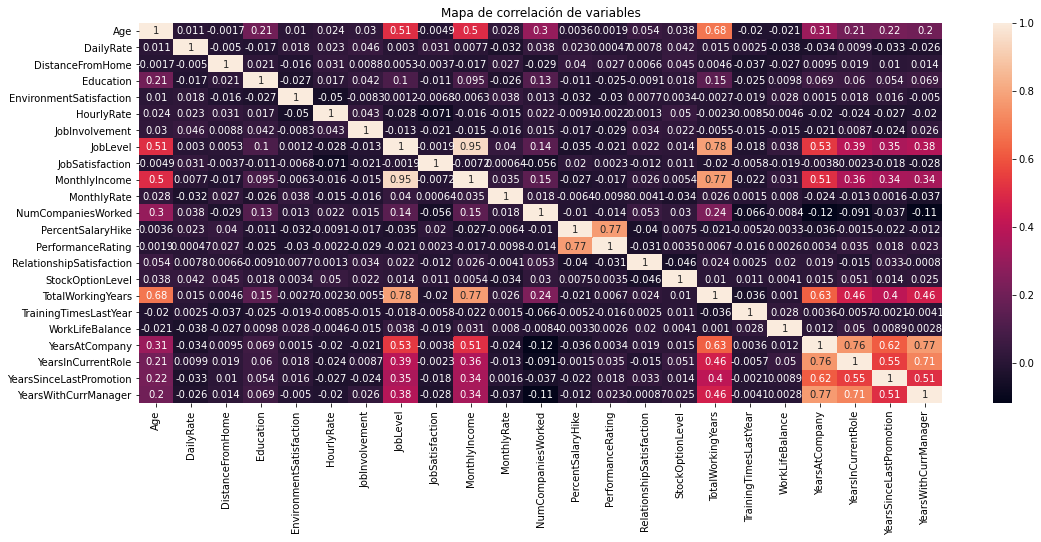

In [8]:
plt.figure(figsize=(18, 7))
sns.heatmap(df1.corr(), annot=True)
plt.title( "Mapa de correlación de variables") 
plt.show()

### Correlación de variables considerando la Deserción

In [10]:
# Las siguientes son las variables numericas del dataset:
Numericas = df1[['Attrition' ,'Age', 'DistanceFromHome','HourlyRate',
                 'MonthlyIncome', 'PercentSalaryHike','TotalWorkingYears',
                 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager' ]]

<Figure size 432x288 with 0 Axes>

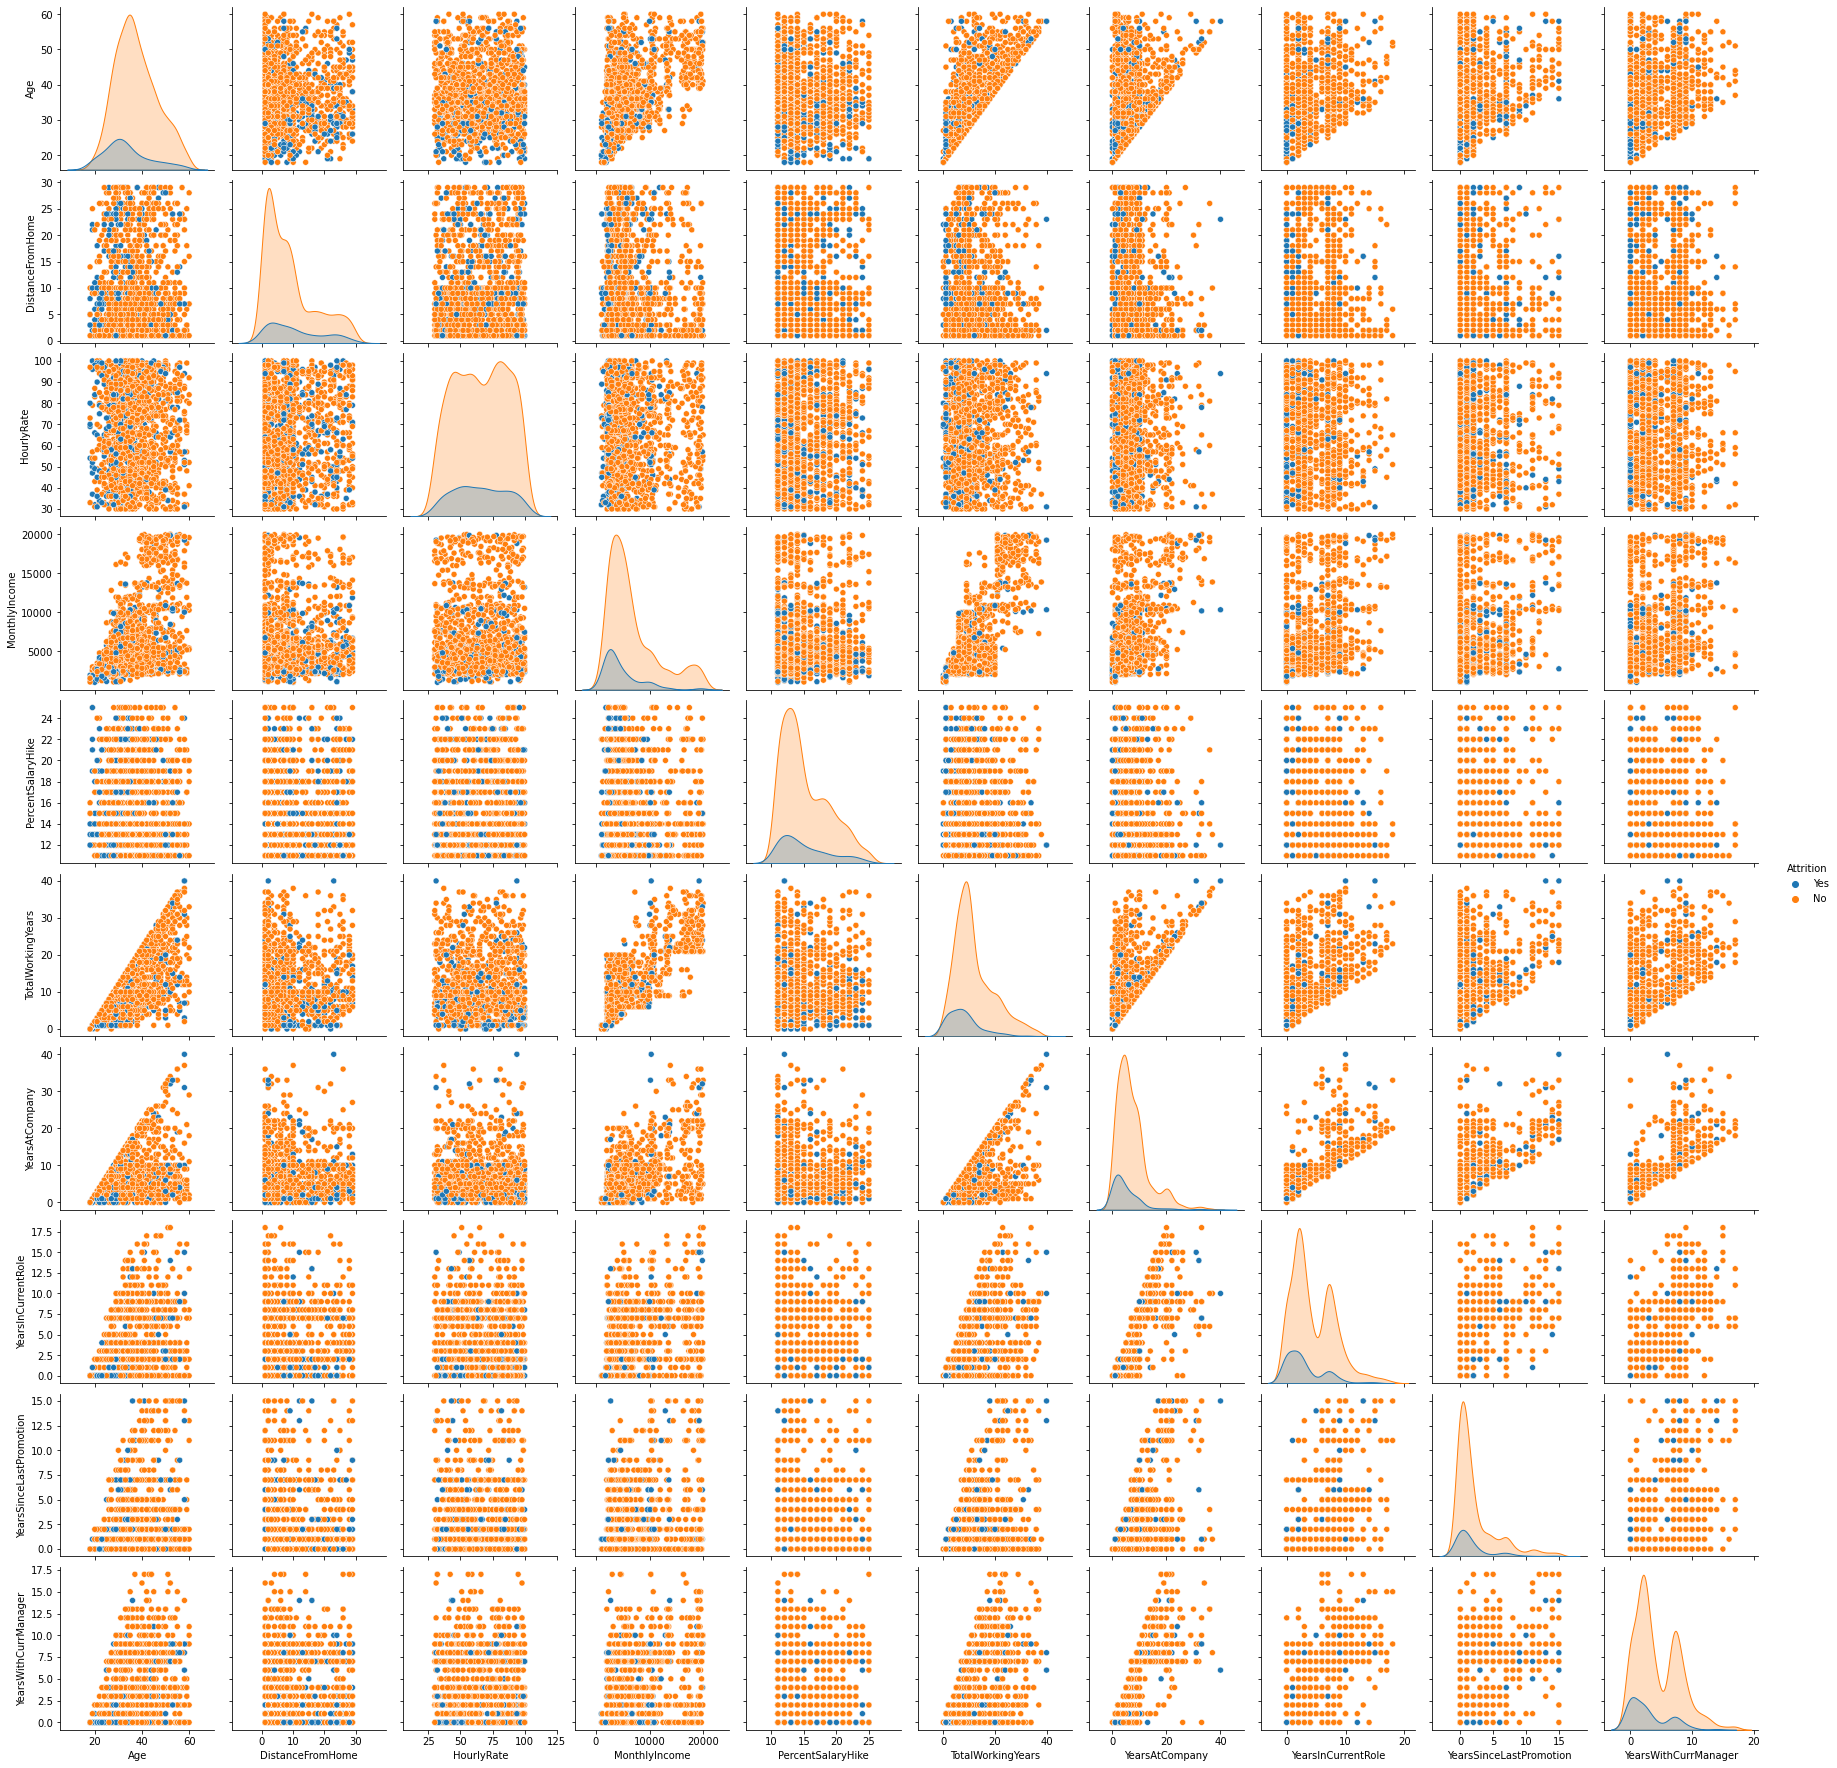

In [11]:
plt.figure()
sns.pairplot(Numericas, hue="Attrition") 
plt.show()